# 化工原理第三次作业

说明：构建了chemetk包，调用其中的VLE用于读取物性数据，McCabeThiele用于迭代计算，plot_mccabe_thiele用于绘图

In [ ]:
from chemetk import VLE, McCabeThiele,plot_mccabe_thiele,VLEManager

vle_manager = VLEManager()

# 1. 定义问题
F, x_F = 100, 0.48
D, x_D = 52.8, 0.9
W, x_W = 47.2, 0.01

# 2. 加载物性数据
# 构建数据文件的路径
data_path=vle_manager.get_file_path_by_filename("methanol_water_vle")
assert data_path is not None, "未找到methanol_water_vle数据文件路径"
vle = VLE(data_path=data_path)

正在从包内目录加载VLE数据: /home/Grtresy/VSCodeRepository/ChemicalEngineeringToolkits/src/chemetk/data
正在从用户目录加载VLE数据: /home/Grtresy/.cache/chemetk/vle
['methanol_water_vle']


## 3-1

操作线交点计算: x_intersect = 0.4800, y_intersect = 0.7425
从塔顶开始塔板迭代计算 (考虑液相Murphree效率)...
目标釜液组成 x_W = 0.01
液相Murphree效率 E_ml = 1.0
--------------------------------------------------------------------------------
第 1级: x = 0.9000, y = 0.9000, 温度 = 66.1°C, 段别 = 精馏段
第 2级: x = 0.7523, y = 0.9000, 温度 = 68.5°C, 段别 = 精馏段
第 3级: x = 0.6213, y = 0.8446, 温度 = 70.8°C, 段别 = 精馏段
第 4级: x = 0.5128, y = 0.7955, 温度 = 72.8°C, 段别 = 精馏段
第 5级: x = 0.4322, y = 0.7548, 温度 = 74.7°C, 段别 = 提馏段
第 6级: x = 0.2949, y = 0.6681, 温度 = 78.3°C, 段别 = 提馏段
第 7级: x = 0.1155, y = 0.4541, 温度 = 86.6°C, 段别 = 提馏段
第 8级: x = 0.0272, y = 0.1745, 温度 = 95.4°C, 段别 = 提馏段
第 9级: x = 0.0050, y = 0.0368, 温度 = 99.0°C, 段别 = 提馏段
达到目标釜液组成 x_W = 0.01
   stage  x_liquid   y_vapor  temperature  relative_volatility  efficiency  \
0      1  0.900000  0.900000    66.100000             2.650000         1.0   
1      2  0.752328  0.900000    68.528029             2.955790         1.0   
2      3  0.621349  0.844623    70.771938             3.305588         

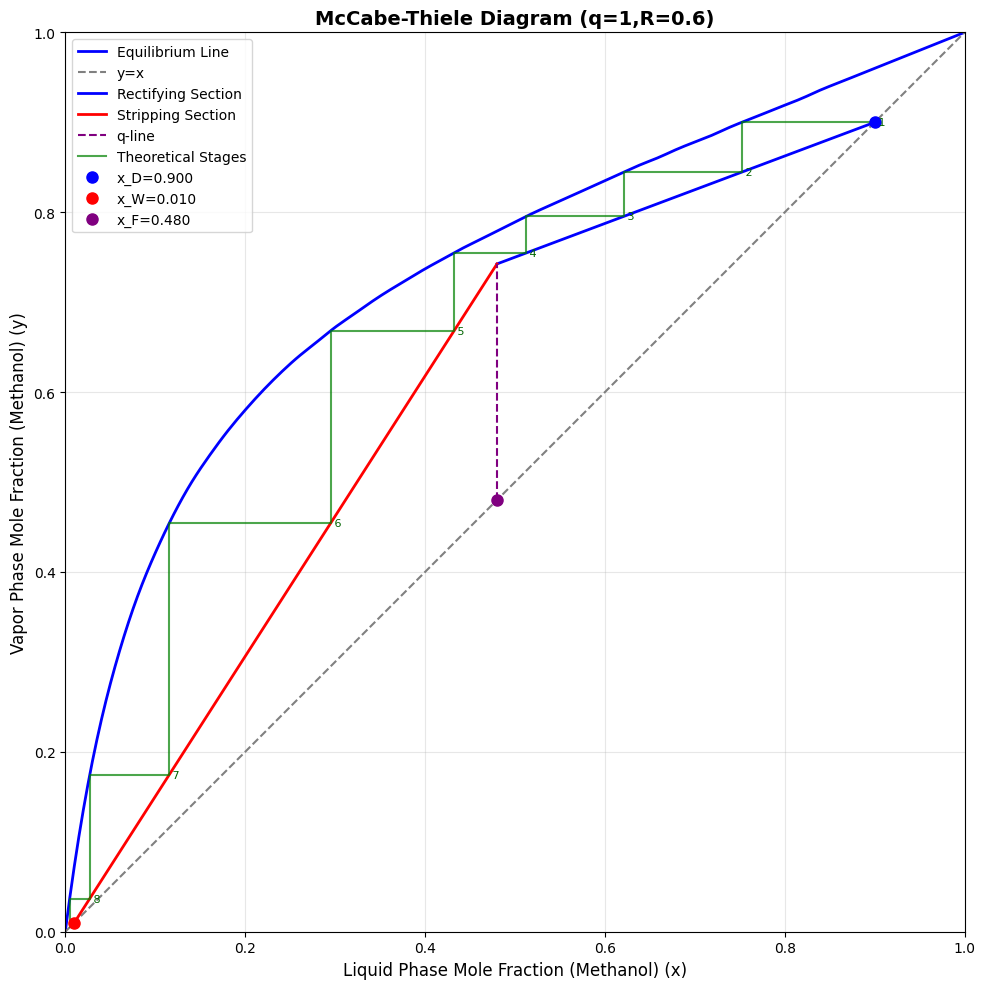

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'McCabe-Thiele Diagram (q=1,R=0.6)'}, xlabel='Liquid Phase Mole Fraction (Methanol) (x)', ylabel='Vapor Phase Mole Fraction (Methanol) (y)'>)

In [2]:
# q=1,R=0.6的情况

column = McCabeThiele(vle=vle, x_D=x_D, x_W=x_W, x_F=x_F, q=1, R=0.6,D=D,W=W,F=F)
result = column.calculate_stages(start_from='top')
print(result)
plot_mccabe_thiele(column, plot_stages=True, title="McCabe-Thiele Diagram (q=1,R=0.6)", show=True)


操作线交点计算: x_intersect = 0.4800, y_intersect = 0.8031


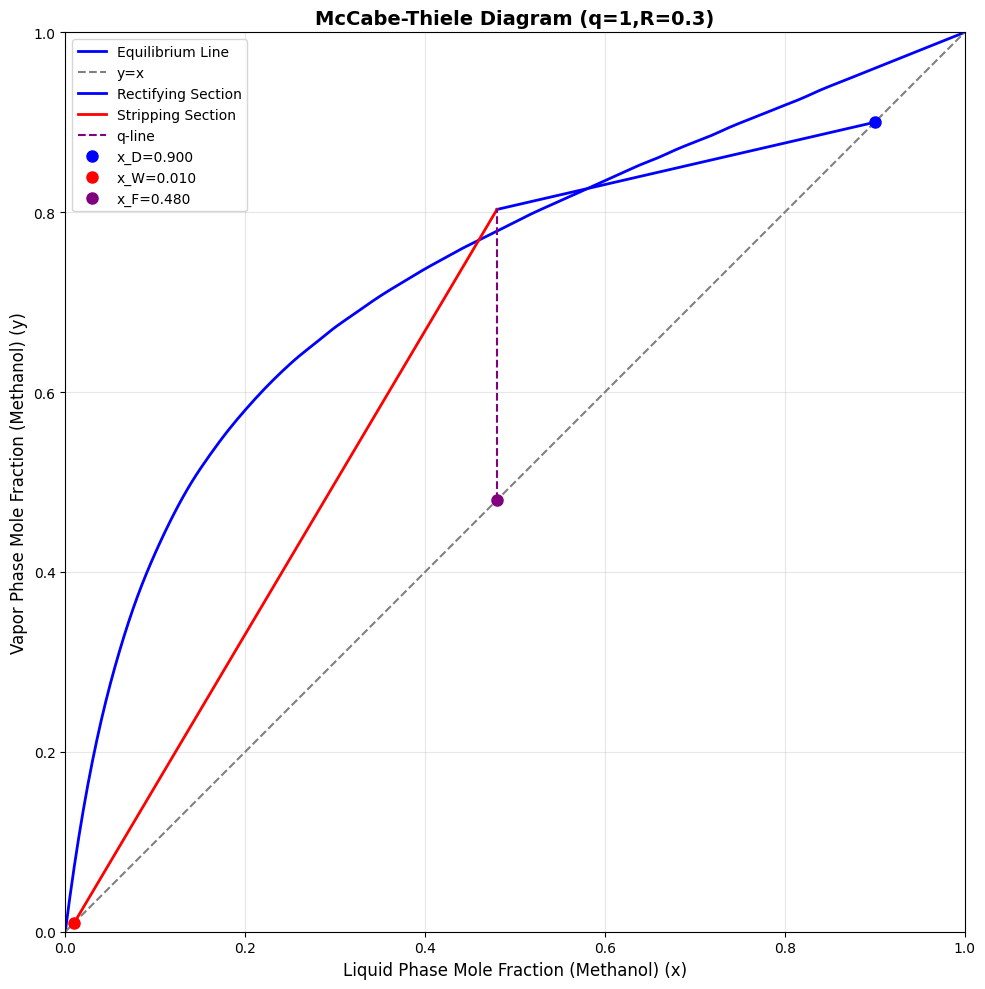

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'McCabe-Thiele Diagram (q=1,R=0.3)'}, xlabel='Liquid Phase Mole Fraction (Methanol) (x)', ylabel='Vapor Phase Mole Fraction (Methanol) (y)'>)

In [3]:
# q=1,R=0.3的情况

column = McCabeThiele(vle=vle, x_D=x_D, x_W=x_W, x_F=x_F, q=1, R=0.3,D=D,W=W,F=F)
plot_mccabe_thiele(column, plot_stages=False, title="McCabe-Thiele Diagram (q=1,R=0.3)", show=True)


## 3-2

操作线交点计算: x_intersect = -0.2200, y_intersect = 0.4800


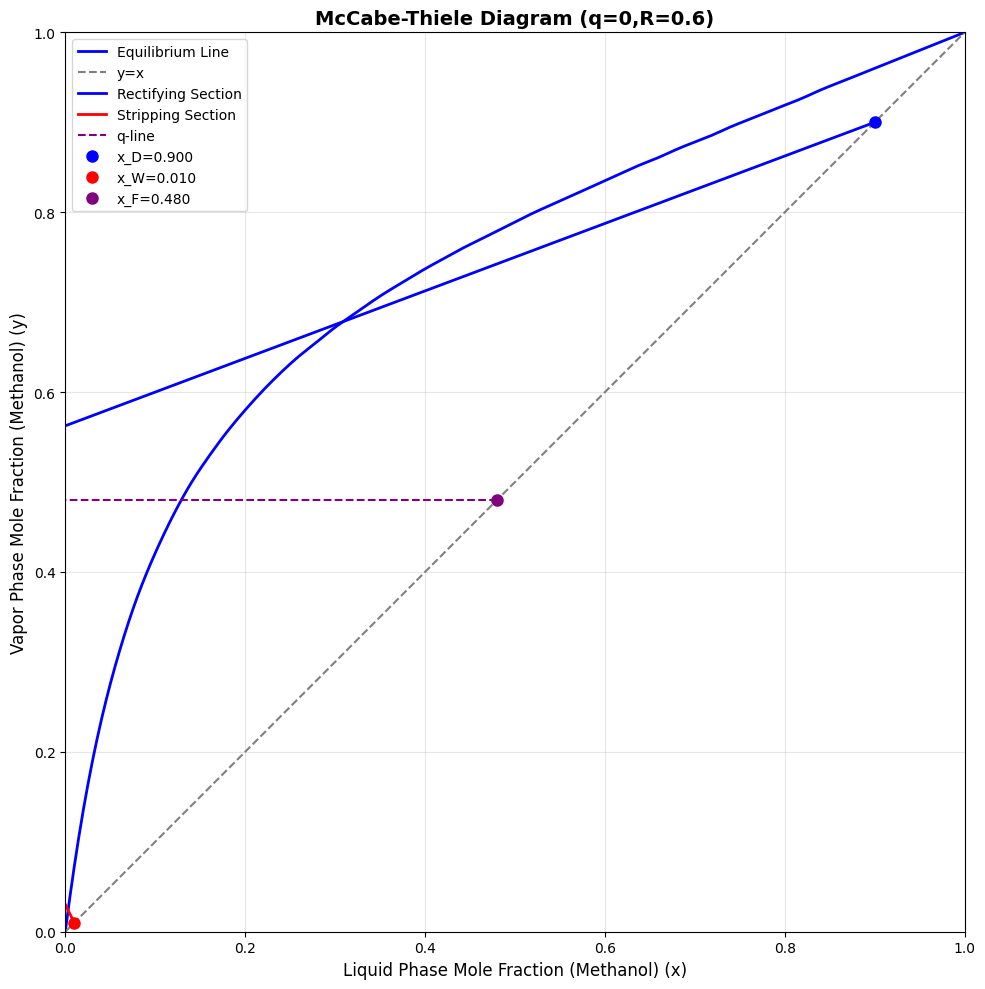

操作线交点计算: x_intersect = -0.9200, y_intersect = 0.4800


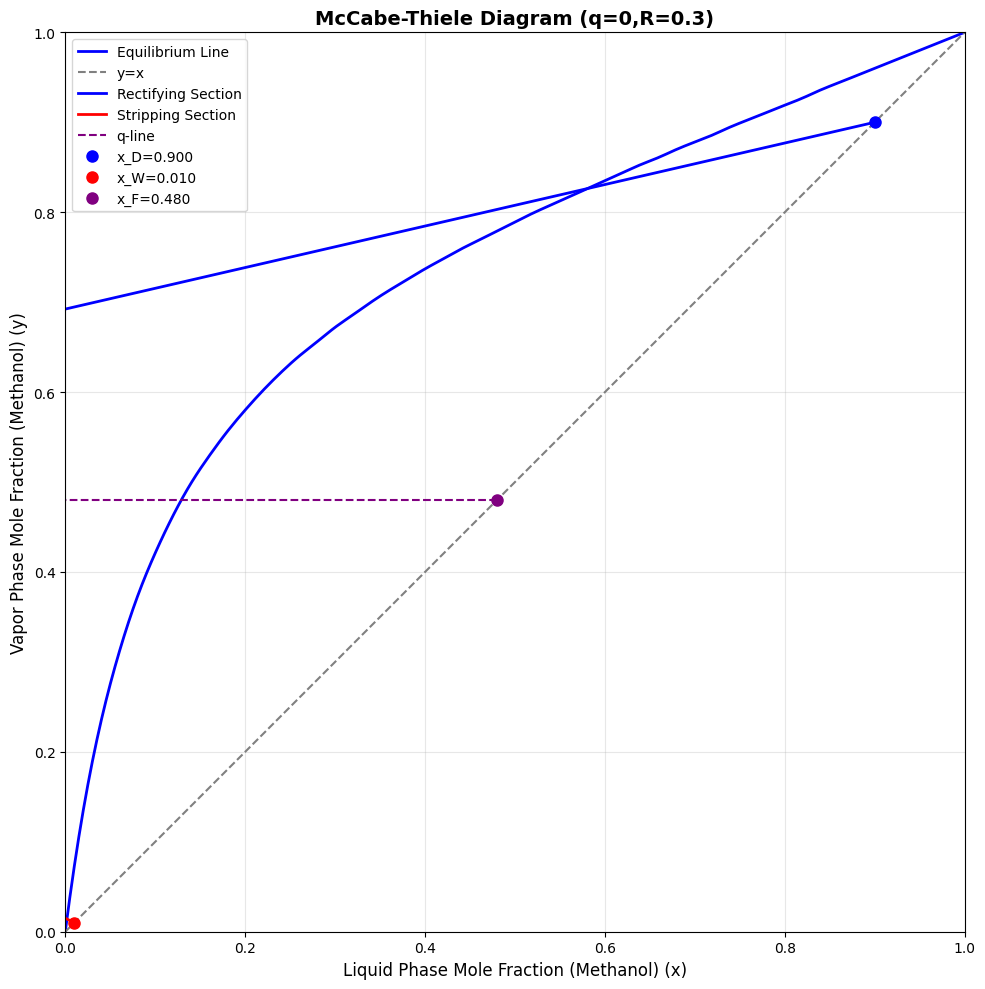

操作线交点计算: x_intersect = 0.2700, y_intersect = 0.4800
从塔顶开始塔板迭代计算 (考虑液相Murphree效率)...
目标釜液组成 x_W = 0.01
液相Murphree效率 E_ml = 1.0
--------------------------------------------------------------------------------
第 1级: x = 0.9000, y = 0.9000, 温度 = 66.1°C, 段别 = 精馏段
第 2级: x = 0.7523, y = 0.9000, 温度 = 68.5°C, 段别 = 精馏段
第 3级: x = 0.5255, y = 0.8016, 温度 = 72.6°C, 段别 = 精馏段
第 4级: x = 0.2729, y = 0.6503, 温度 = 79.0°C, 段别 = 精馏段
第 5级: x = 0.1300, y = 0.4819, 温度 = 85.7°C, 段别 = 提馏段
第 6级: x = 0.0382, y = 0.2271, 温度 = 93.9°C, 段别 = 提馏段
第 7级: x = 0.0084, y = 0.0609, 温度 = 98.4°C, 段别 = 提馏段
达到目标釜液组成 x_W = 0.01
   stage  x_liquid   y_vapor  temperature  relative_volatility  efficiency  \
0      1  0.900000  0.900000    66.100000             2.650000         1.0   
1      2  0.752328  0.900000    68.528029             2.955790         1.0   
2      3  0.525518  0.801552    72.594161             3.637358         1.0   
3      4  0.272899  0.650345    79.034212             4.957697         1.0   
4      5  0.130039 

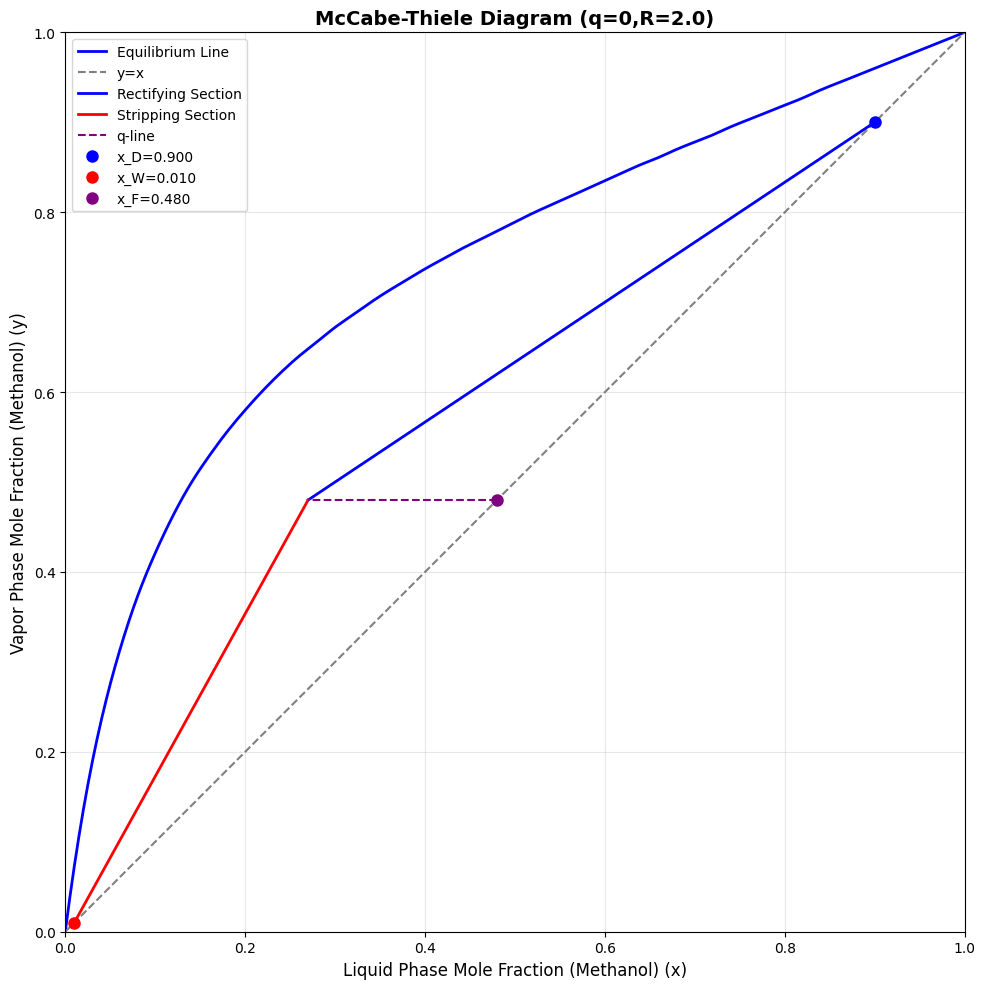

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'McCabe-Thiele Diagram (q=0,R=2.0)'}, xlabel='Liquid Phase Mole Fraction (Methanol) (x)', ylabel='Vapor Phase Mole Fraction (Methanol) (y)'>)

In [4]:
# q=0,R=0.6的情况

column = McCabeThiele(vle=vle, x_D=x_D, x_W=x_W, x_F=x_F, q=0, R=0.6,D=D,W=W,F=F)
# result = column.calculate_stages(start_from='top')
# print(result)
plot_mccabe_thiele(column, plot_stages=False, title="McCabe-Thiele Diagram (q=0,R=0.6)", show=True)

# q=0,R=0.3的情况

column = McCabeThiele(vle=vle, x_D=x_D, x_W=x_W, x_F=x_F, q=0, R=0.3,D=D,W=W,F=F)
# result = column.calculate_stages(start_from='top')
# print(result)
plot_mccabe_thiele(column, plot_stages=False, title="McCabe-Thiele Diagram (q=0,R=0.3)", show=True)

# q=0,R=2.0的情况

column = McCabeThiele(vle=vle, x_D=x_D, x_W=x_W, x_F=x_F, q=0, R=2.0,D=D,W=W,F=F)
result = column.calculate_stages(start_from='top')
print(result)
plot_mccabe_thiele(column, plot_stages=False, title="McCabe-Thiele Diagram (q=0,R=2.0)", show=True)


## 3-3

In [5]:
# q=1,R=0.6,E_MV=0.9的情况

column = McCabeThiele(vle=vle, x_D=x_D, x_W=x_W, x_F=x_F, q=1, R=0.6,D=D,W=W,F=F)
result = column.calculate_stages(start_from='bottom',murphree_efficiency=0.9)
print(result)

操作线交点计算: x_intersect = 0.4800, y_intersect = 0.7425
从塔釜开始塔板迭代计算 (考虑气相Murphree效率)...
目标馏出液组成 x_D = 0.9
气相Murphree效率 E_mv = 0.9
--------------------------------------------------------------------------------
第 1级: x = 0.0100, y_实际 = 0.0726, y_平衡 = 0.0726, 段别 = 提馏段
第 2级: x = 0.0501, y_实际 = 0.2555, y_平衡 = 0.2758, 段别 = 提馏段
第 3级: x = 0.1675, y_实际 = 0.5111, y_平衡 = 0.5395, 段别 = 提馏段
第 4级: x = 0.3315, y_实际 = 0.6757, y_平衡 = 0.6940, 段别 = 提馏段
第 5级: x = 0.4371, y_实际 = 0.7493, y_平衡 = 0.7575, 段别 = 提馏段
第 6级: x = 0.4843, y_实际 = 0.7780, y_平衡 = 0.7811, 段别 = 精馏段
第 7级: x = 0.5746, y_实际 = 0.8190, y_平衡 = 0.8236, 段别 = 精馏段
第 8级: x = 0.6840, y_实际 = 0.8664, y_平衡 = 0.8717, 段别 = 精馏段
第 9级: x = 0.8105, y_实际 = 0.9174, y_平衡 = 0.9231, 段别 = 精馏段
达到目标馏出液组成 x_D = 0.9
   stage  x_liquid  y_vapor_actual  y_vapor_equilibrium  temperature  \
0      1  0.010000        0.072566             0.072566    98.147718   
1      2  0.050139        0.255519             0.275847    92.477154   
2      3  0.167514        0.511062          